In [1]:
pip install imutils

  Preparing metadata (setup.py) ... - \ done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25834 sha256=ed661e529844e91ed8af9072bf8c5162712e25da526dc620677ce7d72de0b342
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


# Import Libraries

In [2]:
import os
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import imutils
import shutil
%matplotlib inline

# Import Dataset

In [3]:
# Define paths for dataset
base_dir = '/kaggle/input/dataset/Br35H'
no_tumor = base_dir + 'no'
yes_tumor = base_dir + 'yes'

# Function for cropping image

In [4]:
def crop_brain_contour(image, plot=False):
    
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions & dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    

    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # Crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    # Plot to see the results of cropping the image (will only execute if plot is set to true)
    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        
        plt.show()
    
    return new_image

# Test on sample image

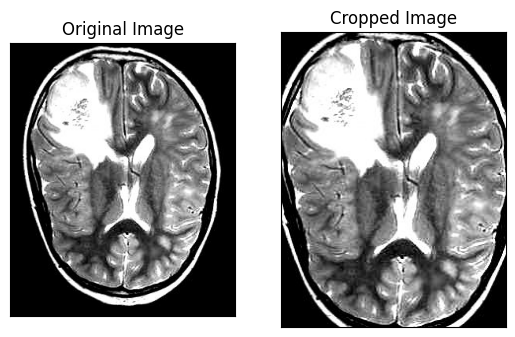

In [5]:
ex_img = cv2.imread('/kaggle/input/dataset/Br35H/yes/y0.jpg')
ex_new_img = crop_brain_contour(ex_img, True)

# Resize to 224x224 pixels

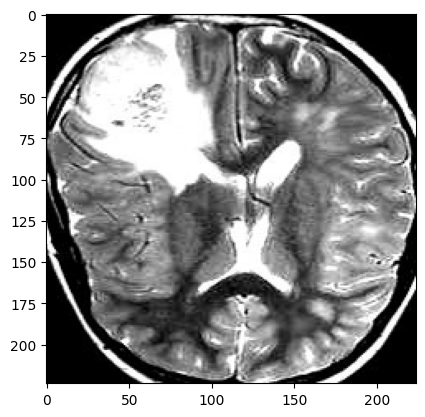

In [6]:
ex_new_img = cv2.resize(ex_new_img,dsize=(224, 224),interpolation=cv2.INTER_CUBIC)
plt.imshow(ex_new_img)

# Implement on all images in folder

In [7]:
def process_and_save_images(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        
    for subdir in ['no', 'yes']:
        subfolder_path = os.path.join(input_folder, subdir)
        output_subfolder_path = os.path.join(output_folder, subdir)
        
        if not os.path.exists(output_subfolder_path):
            os.makedirs(output_subfolder_path)
            
        for filename in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, filename)
            image = cv2.imread(img_path)
            
            if image is None:
                print('cannot read image')
                continue  # Skip if the image cannot be read
            
            cropped_image = crop_brain_contour(image,False)
            cropped_image = cv2.resize(cropped_image,dsize=(224, 224),interpolation=cv2.INTER_CUBIC)
            output_path = os.path.join(output_subfolder_path, filename)
            cv2.imwrite(output_path, cropped_image)
#             print(f"Saved cropped image to: {output_path}")

# Save cropped images into new folder

In [8]:
# Define output directory
output_dir = '/kaggle/working/cropped'

# Process and save images
process_and_save_images(base_dir, output_dir)

In [9]:
# Zip the cropped folder
shutil.make_archive('/kaggle/working/cropped', 'zip', '/kaggle/working/cropped')

'/kaggle/working/cropped.zip'